In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import scipy.linalg as la
from scipy.stats import linregress

import matplotlib
matplotlib.rc('xtick',labelsize=22)
matplotlib.rc('ytick',labelsize=16)
matplotlib.rc('font',size = 24)
matplotlib.rc('legend',fontsize = 17)
matplotlib.rc('figure',titlesize = 25)

### This code returns the time series of local balance for any country 

In [66]:
def initialize_df():
    
    # import and clean the dataframe with alliances and conflicts
    
    df = pd.read_csv('allies_and_enemies_1816_2014_iso.csv')

    df = df[(df['alliance'] != 0) | (df['conflict']!=0)]   #filter entries with no link
    
    df['weight'] = df['alliance']+df['conflict']+df['alliance']*df['conflict']   # merge alliances and conflicts in a single column
    df = df.drop(columns = ['alliance','conflict'])
    
    return df



def create_network(df, year):
    
    # returns a Graph object corresponding to the international relations network of the given year
    # edges have a weighted attribute which can be 1 or -1
    
    df2 = df[df['year']==year]   # select one particular year    
    G = nx.from_pandas_edgelist(df2, source ='statea', target = 'stateb', edge_attr='weight')
    
    return G




def local_balance(G, country):   
    
    ### find node balance of a given country for one specific graph (i.e. one year)   ###
    
    # find the index of the specific country
    
    idx = np.where(np.array(G.nodes()) == country)[0][0]    
    
    # calculate signed communicability
    A = nx.adjacency_matrix(G).todense()
    A0 = np.abs(A)
    
    Comm = la.expm(A)
    Comm0 = la.expm(A0)
    
    # calculate balance
    Ki = np.diag(Comm)/np.diag(Comm0)       # node balance
    
    return Ki[idx]




def local_balance_timeseries(country):
    
    # finds the local balance for several years and creates a balance time series for a specific country
    
    df = initialize_df()
    years_v = np.arange(1816,2015)
    Kloc = np.zeros(len(years_v))
    
    
    for i, year in enumerate(years_v):
        
        G = create_network(df, year)
    
        if country not in G.nodes():
            
            Kloc[i] = None
            
        else:
            
            Kloc[i] = local_balance(G, country)
    
    return years_v, Kloc

In [78]:
####    MAIN   ####


years_v, Kloc1 = local_balance_timeseries('FRA')
years_v, Kloc2 = local_balance_timeseries('GBR')
years_v, Kloc3 = local_balance_timeseries('RUS')
years_v, Kloc4 = local_balance_timeseries('JPN')



/tmp/ipykernel_933093/4039634684.py:38: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
/tmp/ipykernel_933093/4039634684.py:38: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
/tmp/ipykernel_933093/4039634684.py:38: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
/tmp/ipykernel_933093/4039634684.py:38: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


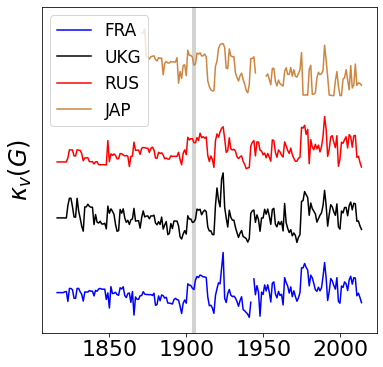

In [87]:
fig, ax = plt.subplots(figsize = (6,6))

ax.plot(years_v, Kloc1, 'b', label = 'FRA')
ax.plot(years_v, Kloc2+1, 'k', label = 'UKG')
ax.plot(years_v, Kloc3+2, 'r', label = 'RUS')
ax.plot(years_v, Kloc4+3, 'peru', label = 'JAP')
ax.fill_between([1904,1906],-1,5, color = 'lightgray')
ax.set_ylim([-0.2,4.2])
ax.legend()
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_ylabel('$\kappa_v(G)$')
plt.savefig('Examples_local_balance_timeseries.pdf')